In [2]:
import pandas as pd
import requests
import json
import numpy as np
from functions_support import *
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel("/Users/joaoalmeida/Downloads/CASOS_OBSCARE_WCR (1).xlsx")


In [4]:
##fill data of ord_cols
def fill_data_ord_cols(x):
    """
    Se A_PARA == 1 and CESARIANA == 1 then EUTOCITO== 0
    Se A_PARA == 1 and EUTOCITO(s) == 1 then CESARIANA== 0
    """
    if x["A_PARA"]==x["CESARIANAS_ANTERIOR"] and x["A_PARA"] is not None:
        return x["A_PARA"],0,0,0,x["CESARIANAS_ANTERIOR"]

    if x["A_PARA"]== x["EUTOCITO_ANTERIOR"] and x["A_PARA"] is not None :
        return x["A_PARA"],x["EUTOCITO_ANTERIOR"],	0,0,0
    if x["A_PARA"]== x["VENTOSAS_ANTERIOR"] and x["A_PARA"] is not None :
        return x["A_PARA"],0,	x["VENTOSAS_ANTERIOR"],0,0
    if x["A_PARA"]== x["FORCEPS_ANTERIOR"] and x["A_PARA"] is not None :
        return x["A_PARA"],0,	0,x["FORCEPS_ANTERIOR"],0


    if x["CESARIANAS_ANTERIOR"]+ x["EUTOCITO_ANTERIOR"] ==x["A_PARA"] and x["A_PARA"] is not None :
        return x["A_PARA"],x["EUTOCITO_ANTERIOR"],	0,0,x["CESARIANAS_ANTERIOR"]
    if x["CESARIANAS_ANTERIOR"]+ x["VENTOSAS_ANTERIOR"] ==x["A_PARA"] and x["A_PARA"] is not None :
        return x["A_PARA"],0,	x["VENTOSAS_ANTERIOR"],0,x["CESARIANAS_ANTERIOR"]
    if x["CESARIANAS_ANTERIOR"]+ x["FORCEPS_ANTERIOR"] ==x["A_PARA"] and x["A_PARA"] is not None :
        return x["A_PARA"],0,	0,x["FORCEPS_ANTERIOR"],x["CESARIANAS_ANTERIOR"]


    if x["FORCEPS_ANTERIOR"]+ x["EUTOCITO_ANTERIOR"] ==x["A_PARA"] and x["A_PARA"] is not None :
        return x["A_PARA"],x["EUTOCITO_ANTERIOR"],	0,x["FORCEPS_ANTERIOR"],0
    if x["FORCEPS_ANTERIOR"]+ x["VENTOSAS_ANTERIOR"] ==x["A_PARA"] and x["A_PARA"] is not None :
        return x["A_PARA"],0,	x["VENTOSAS_ANTERIOR"],x["FORCEPS_ANTERIOR"],0
    if x["VENTOSAS_ANTERIOR"]+ x["EUTOCITO_ANTERIOR"] ==x["A_PARA"] and x["A_PARA"] is not None :
        return x["A_PARA"],x["EUTOCITO_ANTERIOR"],	x["VENTOSAS_ANTERIOR"],0,0



    if x["A_GESTA"]==1:
        return 0,0,0,0,0
    if x["A_PARA"]==0:
        return x["A_PARA"],0,0,0,0

    else:
        return x["A_PARA"],x["EUTOCITO_ANTERIOR"],	x["VENTOSAS_ANTERIOR"],	x["FORCEPS_ANTERIOR"],x["CESARIANAS_ANTERIOR"]
#df[["A_PARA","EUTOCITO_ANTERIOR","VENTOSAS_ANTERIOR","FORCEPS_ANTERIOR","CESARIANAS_ANTERIOR"]]=df.apply(fill_data_ord_cols,axis=1,result_type="expand")

In [4]:
#row=line.to_dict()
row=df.iloc[1,:].to_dict()
row["silo"]="5"
try:
    row["GRUPO_ROBSON"]=float(row["GRUPO_ROBSON"])
    if row["GS"]=="0,RH_POSITIVO":
        row["GS"]="O,RH_POSITIVO"
    if row["GS"]=="0,RH_NEGATIVO":
        row["GS"]="O,RH_NEGATIVO"
    row["A_GESTA"]=float(row["A_GESTA"])
except:
    pass

ndf = pd.DataFrame(row, index=[0])
#print(row)
ndf[["A_PARA","EUTOCITO_ANTERIOR","VENTOSAS_ANTERIOR","FORCEPS_ANTERIOR","CESARIANAS_ANTERIOR"]]=ndf.apply(fill_data_ord_cols,axis=1,result_type="expand")
print(ndf[["A_PARA","EUTOCITO_ANTERIOR","VENTOSAS_ANTERIOR","FORCEPS_ANTERIOR","CESARIANAS_ANTERIOR"]])
print(ndf["APRESENTACAO_ADMISSAO"])
final_score,decisions,lof_score,ee_score,missing_score,correctness_score,iqr_score,expectations_score=quality_score(ndf)


   A_PARA  EUTOCITO_ANTERIOR  VENTOSAS_ANTERIOR  FORCEPS_ANTERIOR   
0     5.0                5.0                0.0               0.0  \

   CESARIANAS_ANTERIOR  
0                  0.0  
0    -1
Name: APRESENTACAO_ADMISSAO, dtype: object


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


In [12]:
f = open("result-dq.txt", "w")


In [13]:
for idx,line in df.iterrows():
    row=line.to_dict()
    #row=df.iloc[0,:].to_dict()
    row["silo"]="5"
    try:
        row["GRUPO_ROBSON"]=float(row["GRUPO_ROBSON"])
        if row["GS"]=="0,RH_POSITIVO":
            row["GS"]="O,RH_POSITIVO"
        if row["GS"]=="0,RH_NEGATIVO":
            row["GS"]="O,RH_NEGATIVO"
    except:
        pass
    try:
        ndf = pd.DataFrame(row, index=[0])
        final_score,decisions,lof_score,ee_score,missing_score,correctness_score,iqr_score,expectations_score=quality_score(ndf)
        f.write("final_score:"+str(final_score)+"decisions:"+str(decisions)+"lof_score:"+str(lof_score)+"ee_score:"+str(ee_score)+"missing_score:"+str(missing_score)+"correctness_score:"+str(correctness_score)+"iqr_score:"+str(iqr_score)+"expectations_score:"+str(expectations_score))

    except Exception as err:
        f.write("err "+str(err))
       # f.write("Error")
        

    f.write("\n")


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 3.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10000.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10000.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: DAT
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 3.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10000.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1
CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


In [15]:
quartiles=result_df["4"].quantile([0.25, 0.75])

In [16]:
iqr = quartiles[0.75] - quartiles[0.25]
print(iqr)

0.03


In [13]:
np.mean(result_df)

0.22808253180266833

In [14]:
ff=result_df.loc[result_df["Score"].isnull(),:].index
ff

Index([   1,    2,    3,    5,    6,    8,    9,   12,   13,   14,
       ...
       3206, 3212, 3214, 3215, 3220, 3224, 3225, 3227, 3228, 3230],
      dtype='int64', length=2100)

In [27]:
#redo with nulls only to be faster:
f = open("result-dq2.txt", "w")
for idx,line in df.iterrows():
    if idx in ff:
        row=line.to_dict()
        #row=df.iloc[0,:].to_dict()
        row["silo"]="5"
        try:
            row["GRUPO_ROBSON"]=float(row["GRUPO_ROBSON"])
            if row["GS"]=="0,RH_POSITIVO":
                row["GS"]="O,RH_POSITIVO"
            if row["GS"]=="0,RH_NEGATIVO":
                row["GS"]="O,RH_NEGATIVO"
        except:
            pass
        try:
            ndf = pd.DataFrame(row, index=[0])
            ndf[["A_PARA","EUTOCITO_ANTERIOR","VENTOSAS_ANTERIOR","FORCEPS_ANTERIOR","CESARIANAS_ANTERIOR"]]=ndf.apply(fill_data_ord_cols,axis=1,result_type="expand")

            final_score,decisions,lof_score,ee_score,missing_score,correctness_score,iqr_score,expectations_score=quality_score(ndf)
            f.write("final_score:"+str(final_score)+"decisions:"+str(decisions)+"lof_score:"+str(lof_score)+"ee_score:"+str(ee_score)+"missing_score:"+str(missing_score)+"correctness_score:"+str(correctness_score)+"iqr_score:"+str(iqr_score)+"expectations_score:"+str(expectations_score))

        except Exception as err:
            f.write("err "+str(err))
        # f.write("Error")
    else:
        f.write("done")
        

    f.write("\n")


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10000.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10000.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10000.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: DAT
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


[nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1
CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/Users/joaoalmeida/Library/CloudStorage/OneDrive-Pessoal/HEADS/05. TESE/7.0 Data quality/docker-ml-data-quality/functions_support.py:534: DeprecationWarning: invalid escape sequence \.
  df_evidence.replace("\.", "_", regex=True, inplace=True)
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/inference/ExactInference.py:655: DeprecationWarning: invalid escape sequence \s
  """


KeyboardInterrupt: 

In [16]:
#redo with nulls only to be faster:
f = open("result-dq3.txt", "w")
for idx,line in df.iterrows():
    if idx in ff and idx>1504:
        row=line.to_dict()
        #row=df.iloc[0,:].to_dict()
        row["silo"]="5"
        try:
            row["GRUPO_ROBSON"]=float(row["GRUPO_ROBSON"])
            if row["GS"]=="0,RH_POSITIVO":
                row["GS"]="O,RH_POSITIVO"
            if row["GS"]=="0,RH_NEGATIVO":
                row["GS"]="O,RH_NEGATIVO"
        except:
            pass
        try:
            ndf = pd.DataFrame(row, index=[0])
            ndf[["A_PARA","EUTOCITO_ANTERIOR","VENTOSAS_ANTERIOR","FORCEPS_ANTERIOR","CESARIANAS_ANTERIOR"]]=ndf.apply(fill_data_ord_cols,axis=1,result_type="expand")

            final_score,decisions,lof_score,ee_score,missing_score,correctness_score,iqr_score,expectations_score=quality_score(ndf)
            f.write("final_score:"+str(final_score)+"decisions:"+str(decisions)+"lof_score:"+str(lof_score)+"ee_score:"+str(ee_score)+"missing_score:"+str(missing_score)+"correctness_score:"+str(correctness_score)+"iqr_score:"+str(iqr_score)+"expectations_score:"+str(expectations_score))

        except Exception as err:
            f.write("err "+str(err))
        # f.write("Error")
    else:
        f.write("done")
        

    f.write("\n")


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10012.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 7.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 7.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10043.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 10001.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[nan nan nan nan nan nan nan nan nan nan nan]
eror on a column.....
pred_idx 0 pred 0_0 pred_proba nan pred_ranking 1


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


CHSJ nan
CHSJ 1.0


/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/outliertree/__init__.py:632: UserWarning: Some categorical/ordinal columns had new values that were not present in the training data. These values will be ignored. Columns head: IDE
  warnings.warn(warn_msg)


In [4]:
f = open("result-dq.txt", "r")
data=[]
for i in f.readlines():
    #line=json.loads(i)
    #print(i)
    x=re.search("final_score:(0\.\d{1,2})",i)
    if x:
       # print(x.group())
        data.append(float(x.group().replace("final_score:","")))
    else:
        data.append(np.nan)
    #print(line)
   # try:
        #if line["final_score"]:
      #  data.append(line["final_score"])
   # except:
     #   data.append(np.nan)
f.close()

<>:6: DeprecationWarning: invalid escape sequence \.
<>:6: DeprecationWarning: invalid escape sequence \.
/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_66526/2177435889.py:6: DeprecationWarning: invalid escape sequence \.
  x=re.search("final_score:(0\.\d{1,2})",i)


In [5]:
f = open("result-dq2.txt", "r")
data2=[]
for i in f.readlines():
    #line=json.loads(i)
    #print(i)
    x=re.search("final_score:(0\.\d{1,2})",i)
    if x:
       # print(x.group())
        data2.append(float(x.group().replace("final_score:","")))
    else:
        data2.append(np.nan)
    #print(line)
   # try:
        #if line["final_score"]:
      #  data.append(line["final_score"])
   # except:
     #   data.append(np.nan)
f.close()

<>:6: DeprecationWarning: invalid escape sequence \.
<>:6: DeprecationWarning: invalid escape sequence \.
/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_66526/664317270.py:6: DeprecationWarning: invalid escape sequence \.
  x=re.search("final_score:(0\.\d{1,2})",i)


In [6]:
data2.extend([None] * (3231 - len(data2)))


In [7]:
f = open("result-dq3.txt", "r")
data3=[]
for i in f.readlines():
    #line=json.loads(i)
    #print(i)
    x=re.search("final_score:(0\.\d{1,2})",i)
    if x:
       # print(x.group())
        data3.append(float(x.group().replace("final_score:","")))
    else:
        data3.append(np.nan)
    #print(line)
   # try:
        #if line["final_score"]:
      #  data.append(line["final_score"])
   # except:
     #   data.append(np.nan)
f.close()

<>:6: DeprecationWarning: invalid escape sequence \.
<>:6: DeprecationWarning: invalid escape sequence \.
/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_66526/1299336776.py:6: DeprecationWarning: invalid escape sequence \.
  x=re.search("final_score:(0\.\d{1,2})",i)


In [8]:
result_df=pd.DataFrame(data={"1":data,"2":data2,"3":data3})

In [9]:
result_df

,1,2,3
0,0.23,NaN,NaN
1,NaN,0.20,NaN
2,NaN,0.21,NaN
3,NaN,0.31,NaN
4,0.23,NaN,NaN
...,...,...,...
3226,0.24,NaN,NaN
3227,NaN,NaN,0.22
3228,NaN,NaN,0.21
3229,0.27,NaN,NaN


In [10]:
result_df['4'] = result_df['1'].fillna(result_df['2']).fillna(result_df['3'])
    

In [11]:
result_df.to_csv("result-dq.csv")

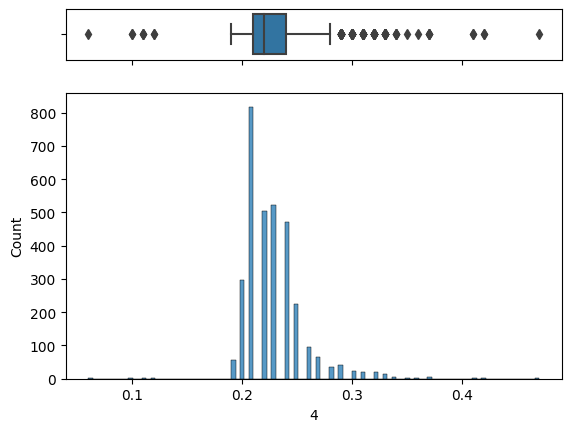

In [12]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(x=result_df["4"], ax=ax_box)
sns.histplot(x=result_df["4"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.savefig("Scoring.png",bbox_inches='tight')
plt.show()
